In [1]:
#import library for visualization and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

# Product Segmentation

## preparing data

### product table

In [2]:
prod = pd.read_csv('dh_product_clean.csv')
prod

,upc,product_description,commodity,brand,product_size,commodity_codes,brand_codes
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0,2,126
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40.0,3,100
2,566300028,MILLER CANE SYRUP,syrups,Miller,19.0,3,81
3,566300029,MILLER CANE SYRUP,syrups,Miller,12.0,3,81
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19.0,3,100
...,...,...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16.0,1,104
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32.0,0,104
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32.0,0,104
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16.0,1,105


#drop some str product before making PCA anlaysis we can look up for descriptive later on

In [3]:
prod_d = prod.drop(['product_description', 'commodity', 'brand'],axis=1)
prod_d.head(3)

,upc,product_size,commodity_codes,brand_codes
0,111112360,25.0,2,126
1,566300023,40.0,3,100
2,566300028,19.0,3,81


## transaction table

In [4]:
trans = pd.read_csv('dh_transactions.csv')
trans.head(5)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [5]:
trans['weekday'] = trans['day'] % 7
trans

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,weekday
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,1
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,1
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,1
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,1
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0,0


#Create transaction feature and likely to relate to product

In [6]:
col = ['dollar_sales', 'time_of_transaction', 'units']
topic = '_mean'
mean = trans.groupby('upc')[['dollar_sales','time_of_transaction','units']].apply('mean')
mean.columns = [(col[0]+topic), (col[1]+topic), (col[2]+topic)]
mean

,dollar_sales_mean,time_of_transaction_mean,units_mean
upc,,,
111112360,6.595714,1604.964286,1.142857
566300023,3.802131,1452.639344,1.098361
566300028,3.197171,1500.142857,1.099258
566300029,1.490000,1128.500000,1.000000
566300035,2.216667,1570.533333,1.000000
...,...,...,...
9999985217,0.947657,1536.109746,1.120339
9999985260,1.410868,1517.783703,1.127671
9999985261,1.414569,1514.743590,1.116659


In [7]:
col = ['dollar_sales', 'time_of_transaction', 'units']
topic = '_std'
std = trans.groupby('upc')[['dollar_sales','time_of_transaction','units']].std()
std.columns = [(col[0]+topic), (col[1]+topic), (col[2]+topic)]
std

,dollar_sales_std,time_of_transaction_std,units_std
upc,,,
111112360,2.608588,356.565872,0.448395
566300023,1.258278,428.157138,0.351422
566300028,1.602666,435.485402,0.560524
566300029,0.000000,34.648232,0.000000
566300035,0.070373,359.721691,0.000000
...,...,...,...
9999985217,0.462222,371.798214,0.497481
9999985260,1.195469,447.246096,1.096908
9999985261,0.599790,448.008890,0.484125


In [8]:
col = ['dollar_sales', 'units']
topic = '_sum'
sales_sum = trans.groupby('upc')[col].sum()
sales_sum.columns = [(col[0]+topic), (col[1]+topic)]
sales_sum

,dollar_sales_sum,units_sum
upc,,
111112360,184.68,32
566300023,231.93,67
566300028,3446.55,1185
566300029,2.98,2
566300035,33.25,15
...,...,...
9999985217,2236.47,2644
9999985260,28654.73,22903
9999985261,44962.09,35493


In [9]:
time = trans.groupby('upc')[['time_of_transaction']].mean()
time.columns = ['time_mean']
time

,time_mean
upc,
111112360,1604.964286
566300023,1452.639344
566300028,1500.142857
566300029,1128.500000
566300035,1570.533333
...,...
9999985217,1536.109746
9999985260,1517.783703
9999985261,1514.743590


In [10]:
coup_c = trans.groupby('upc')[['coupon']].count()
coup_c.columns = ['coupon_count']
coup_c

,coupon_count
upc,
111112360,28
566300023,61
566300028,1078
566300029,2
566300035,15
...,...
9999985217,2360
9999985260,20310
9999985261,31785


In [11]:
freq = trans.groupby('upc')[['upc']].count()
freq.columns = ['frequency']
freq

,frequency
upc,
111112360,28
566300023,61
566300028,1078
566300029,2
566300035,15
...,...
9999985217,2360
9999985260,20310
9999985261,31785


In [12]:
store_max = trans.groupby(['upc','store'])['store'].count().sort_values().groupby(level=0).tail(1).to_frame()
store_max.columns = ['store_freq']
store_max = store_max.reset_index('store')
store_max = store_max['store'].to_frame()
store_max.columns=['store_poppular']
store_max

,store_poppular
upc,
5122300002,166
6172005180,181
6566712285,54
6566711853,193
4747900040,193
...,...
3620000250,378
2920000213,190
9999985021,179


In [13]:
# data for product segmentation by PCA
prod_seg = pd.concat([prod_d.set_index('upc'),sales_sum,time,freq,coup_c,store_max],axis=1)
prod_seg

,product_size,commodity_codes,brand_codes,dollar_sales_sum,units_sum,time_mean,frequency,coupon_count,store_poppular
upc,,,,,,,,,
111112360,25.0,2,126,184.68,32,1604.964286,28,28,139
566300023,40.0,3,100,231.93,67,1452.639344,61,61,46
566300028,19.0,3,81,3446.55,1185,1500.142857,1078,1078,67
566300029,12.0,3,81,2.98,2,1128.500000,2,2,59
566300035,19.0,3,100,33.25,15,1570.533333,15,15,152
...,...,...,...,...,...,...,...,...,...
9999985217,16.0,1,104,2236.47,2644,1536.109746,2360,2360,5
9999985260,32.0,0,104,28654.73,22903,1517.783703,20310,20310,109
9999985261,32.0,0,104,44962.09,35493,1514.743590,31785,31785,109


In [14]:
prod_seg.shape

(927, 9)

In [15]:
prod_seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 111112360 to 9999985766
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_size      927 non-null    float64
 1   commodity_codes   927 non-null    int64  
 2   brand_codes       927 non-null    int64  
 3   dollar_sales_sum  927 non-null    float64
 4   units_sum         927 non-null    int64  
 5   time_mean         927 non-null    float64
 6   frequency         927 non-null    int64  
 7   coupon_count      927 non-null    int64  
 8   store_poppular    927 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 72.4 KB


In [16]:
prod_seg.isnull().sum()

product_size        0
commodity_codes     0
brand_codes         0
dollar_sales_sum    0
units_sum           0
time_mean           0
frequency           0
coupon_count        0
store_poppular      0
dtype: int64

Text(0.5, 1.0, 'Feature correlation')

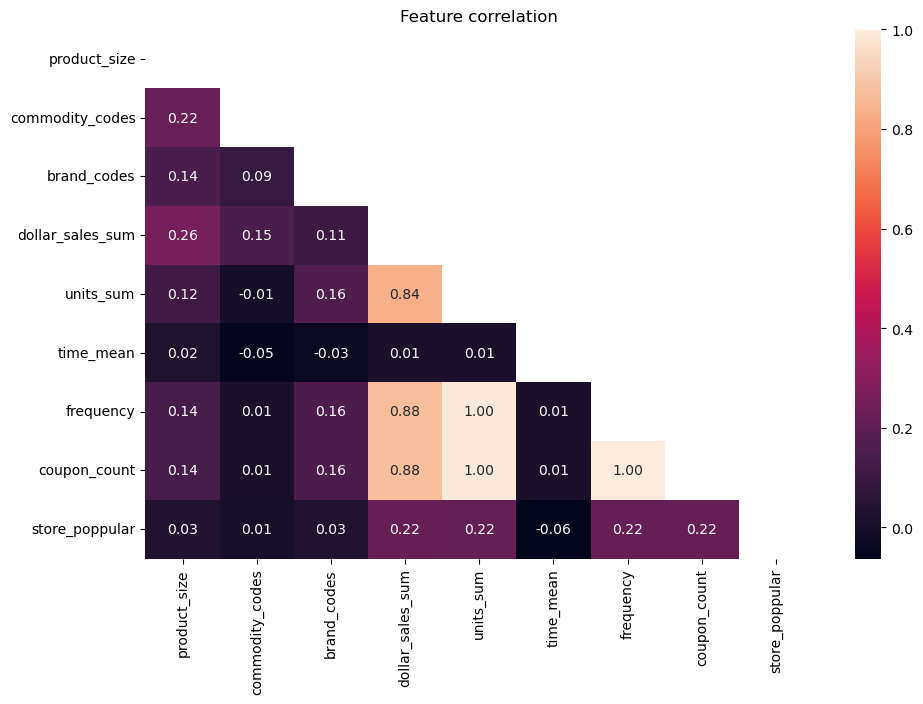

In [17]:
plt.figure(figsize=(10,7))
prod_corr = prod_seg.corr()
mask = np.triu(prod_corr)
sb.heatmap(prod_corr, mask=mask, annot=True, fmt='.2f')
plt.tight_layout()
plt.title('Feature correlation')

In [18]:
#Import library for PCA and Clustering
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [19]:
#scale = preprocessing.scale(prod_seg)
#pca = PCA(n_components=4)
#pca.fit(scale)
#pca_data = pca.transform(scale)
#pca_data.shape

In [20]:
scaler = StandardScaler()
sc_data = scaler.fit_transform(prod_seg)
sc_data.shape

(927, 9)

In [21]:
pca = PCA(n_components=9)
pc = pca.fit_transform(sc_data)
pc.shape

(927, 9)

In [22]:
#di = ['PCA1','PCA2','PCA3','PCA4']
di = ['PCA1','PCA2','PCA3','PCA4','PCA5', 'PCA6', 'PCA7', "PCA8",'PCA9']
pca_df = pd.DataFrame(data=pc ,columns=di)
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-0.901587,1.387254,-0.751065,1.105606,-0.380603,-0.211966,0.139795,-0.003929,-1.480982e-17
1,-0.865257,3.069027,-0.322097,0.324813,1.175507,0.579621,0.509985,-0.005318,-1.527820e-17
2,-0.908344,1.492848,-0.218169,0.117745,1.278435,-0.985548,0.182503,-0.003572,3.986986e-17
3,-1.253554,1.446749,2.657904,0.687131,2.876276,-0.753471,0.165454,-0.009211,4.018129e-18
4,-0.987433,1.596967,-0.327969,0.197894,0.212937,-1.245839,0.274809,0.002355,3.628915e-18
...,...,...,...,...,...,...,...,...,...
922,-0.911040,-0.148176,-0.730817,1.719122,0.907215,0.187806,-0.068854,0.014657,-1.774966e-19
923,2.566922,-0.406992,-0.683422,1.581076,0.393441,2.026717,-0.124364,0.125827,-7.900614e-18
924,4.584811,-0.672759,-0.779747,1.577837,0.735661,1.963078,-0.181954,0.225520,1.405953e-17
925,-0.662775,-0.171482,-0.287230,1.351834,0.142855,0.126990,-0.260843,-0.006367,1.435794e-18


In [23]:
load = pca.components_.T
#loading = pd.DataFrame(data=load, columns =['PCA1','PCA2'], index=prod_seg.columns)
loading = pd.DataFrame(data=load, columns =di, index=prod_seg.columns)
#loading = pd.DataFrame(data=load, columns =['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9'], index=prod_seg.columns)

In [24]:
loading

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
product_size,0.115825,0.613382,-0.191886,-0.157430,-0.106117,0.722042,0.127028,-0.001179,0.000000e+00
commodity_codes,0.037486,0.654283,0.027458,-0.353002,0.195506,-0.625114,0.127046,0.003753,1.732779e-17
brand_codes,0.104735,0.380545,0.059512,0.827727,-0.342827,-0.181774,-0.070492,-0.000993,-1.159860e-16
dollar_sales_sum,0.464945,0.056838,-0.046562,-0.118740,0.086457,0.003301,-0.863417,-0.106552,7.737889e-18
units_sum,0.491904,-0.116267,-0.021821,0.046746,0.074605,-0.028622,0.355646,-0.780373,-6.779230e-19
time_mean,0.002631,-0.112947,-0.841382,-0.127378,-0.460718,-0.225226,0.009516,0.002935,-6.166487e-17
frequency,0.497215,-0.098263,-0.023667,0.030721,0.079045,-0.020915,0.212399,0.435682,7.071068e-01
coupon_count,0.497215,-0.098263,-0.023667,0.030721,0.079045,-0.020915,0.212399,0.435682,-7.071068e-01
store_poppular,0.147016,-0.045227,0.497188,-0.362044,-0.771485,-0.049137,0.021521,0.001675,-7.379776e-17


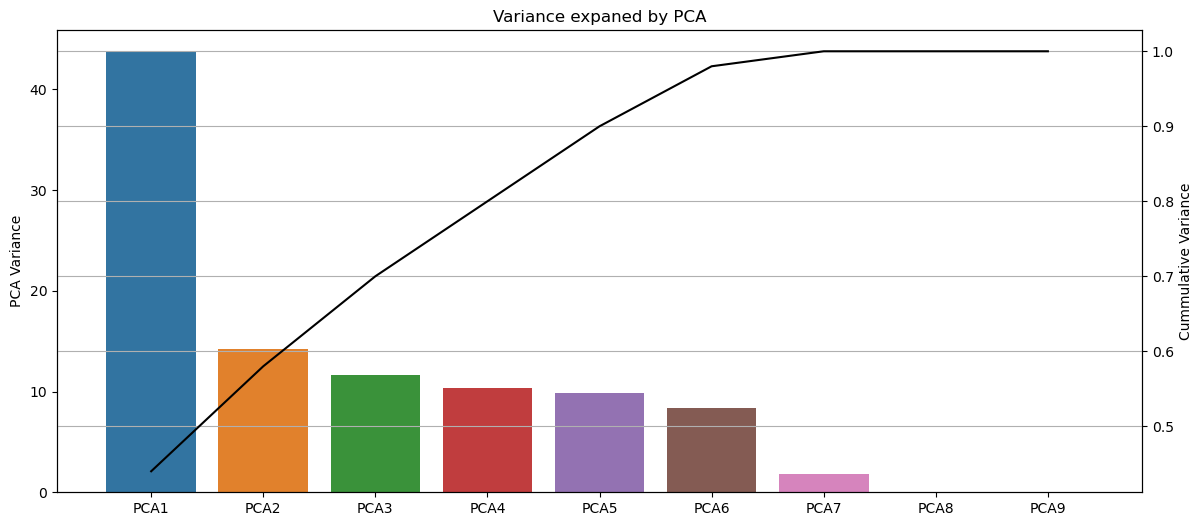

In [25]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)
cum_var = np.round(pca.explained_variance_ratio_.cumsum(), decimals = 2)
labels = ['PCA' + str(i) for i in range(1, len(per_var) + 1)]

plt.figure(figsize=(14,6))
ax1 = sb.barplot(x=labels, y =per_var)
ax1.set_ylabel('PCA Variance')
ax2 = ax1.twinx()
ax2 = sb.lineplot(x=labels, y=cum_var, markers=True, color='black')
ax2.set_ylabel('Cummulative Variance', color='black')
plt.title("Variance expaned by PCA")
plt.grid()

In [26]:
cum_var

array([0.44, 0.58, 0.7 , 0.8 , 0.9 , 0.98, 1.  , 1.  , 1.  ])

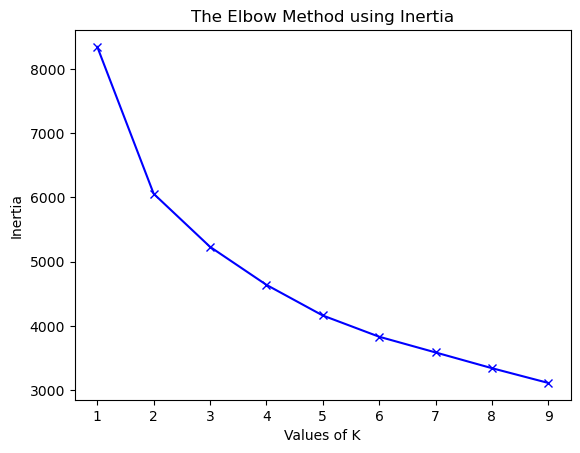

In [27]:
inertia = []
range_val = range(1,10)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(sc_data))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [28]:
kmeans_model=KMeans(2)
kmeans_model.fit_predict(sc_data)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,cluster
0,-0.901587,1.387254,-0.751065,1.105606,-0.380603,-0.211966,0.139795,-0.003929,-1.480982e-17,0
1,-0.865257,3.069027,-0.322097,0.324813,1.175507,0.579621,0.509985,-0.005318,-1.527820e-17,0
2,-0.908344,1.492848,-0.218169,0.117745,1.278435,-0.985548,0.182503,-0.003572,3.986986e-17,0
3,-1.253554,1.446749,2.657904,0.687131,2.876276,-0.753471,0.165454,-0.009211,4.018129e-18,0
4,-0.987433,1.596967,-0.327969,0.197894,0.212937,-1.245839,0.274809,0.002355,3.628915e-18,0
...,...,...,...,...,...,...,...,...,...,...
922,-0.911040,-0.148176,-0.730817,1.719122,0.907215,0.187806,-0.068854,0.014657,-1.774966e-19,0
923,2.566922,-0.406992,-0.683422,1.581076,0.393441,2.026717,-0.124364,0.125827,-7.900614e-18,1
924,4.584811,-0.672759,-0.779747,1.577837,0.735661,1.963078,-0.181954,0.225520,1.405953e-17,1
925,-0.662775,-0.171482,-0.287230,1.351834,0.142855,0.126990,-0.260843,-0.006367,1.435794e-18,0


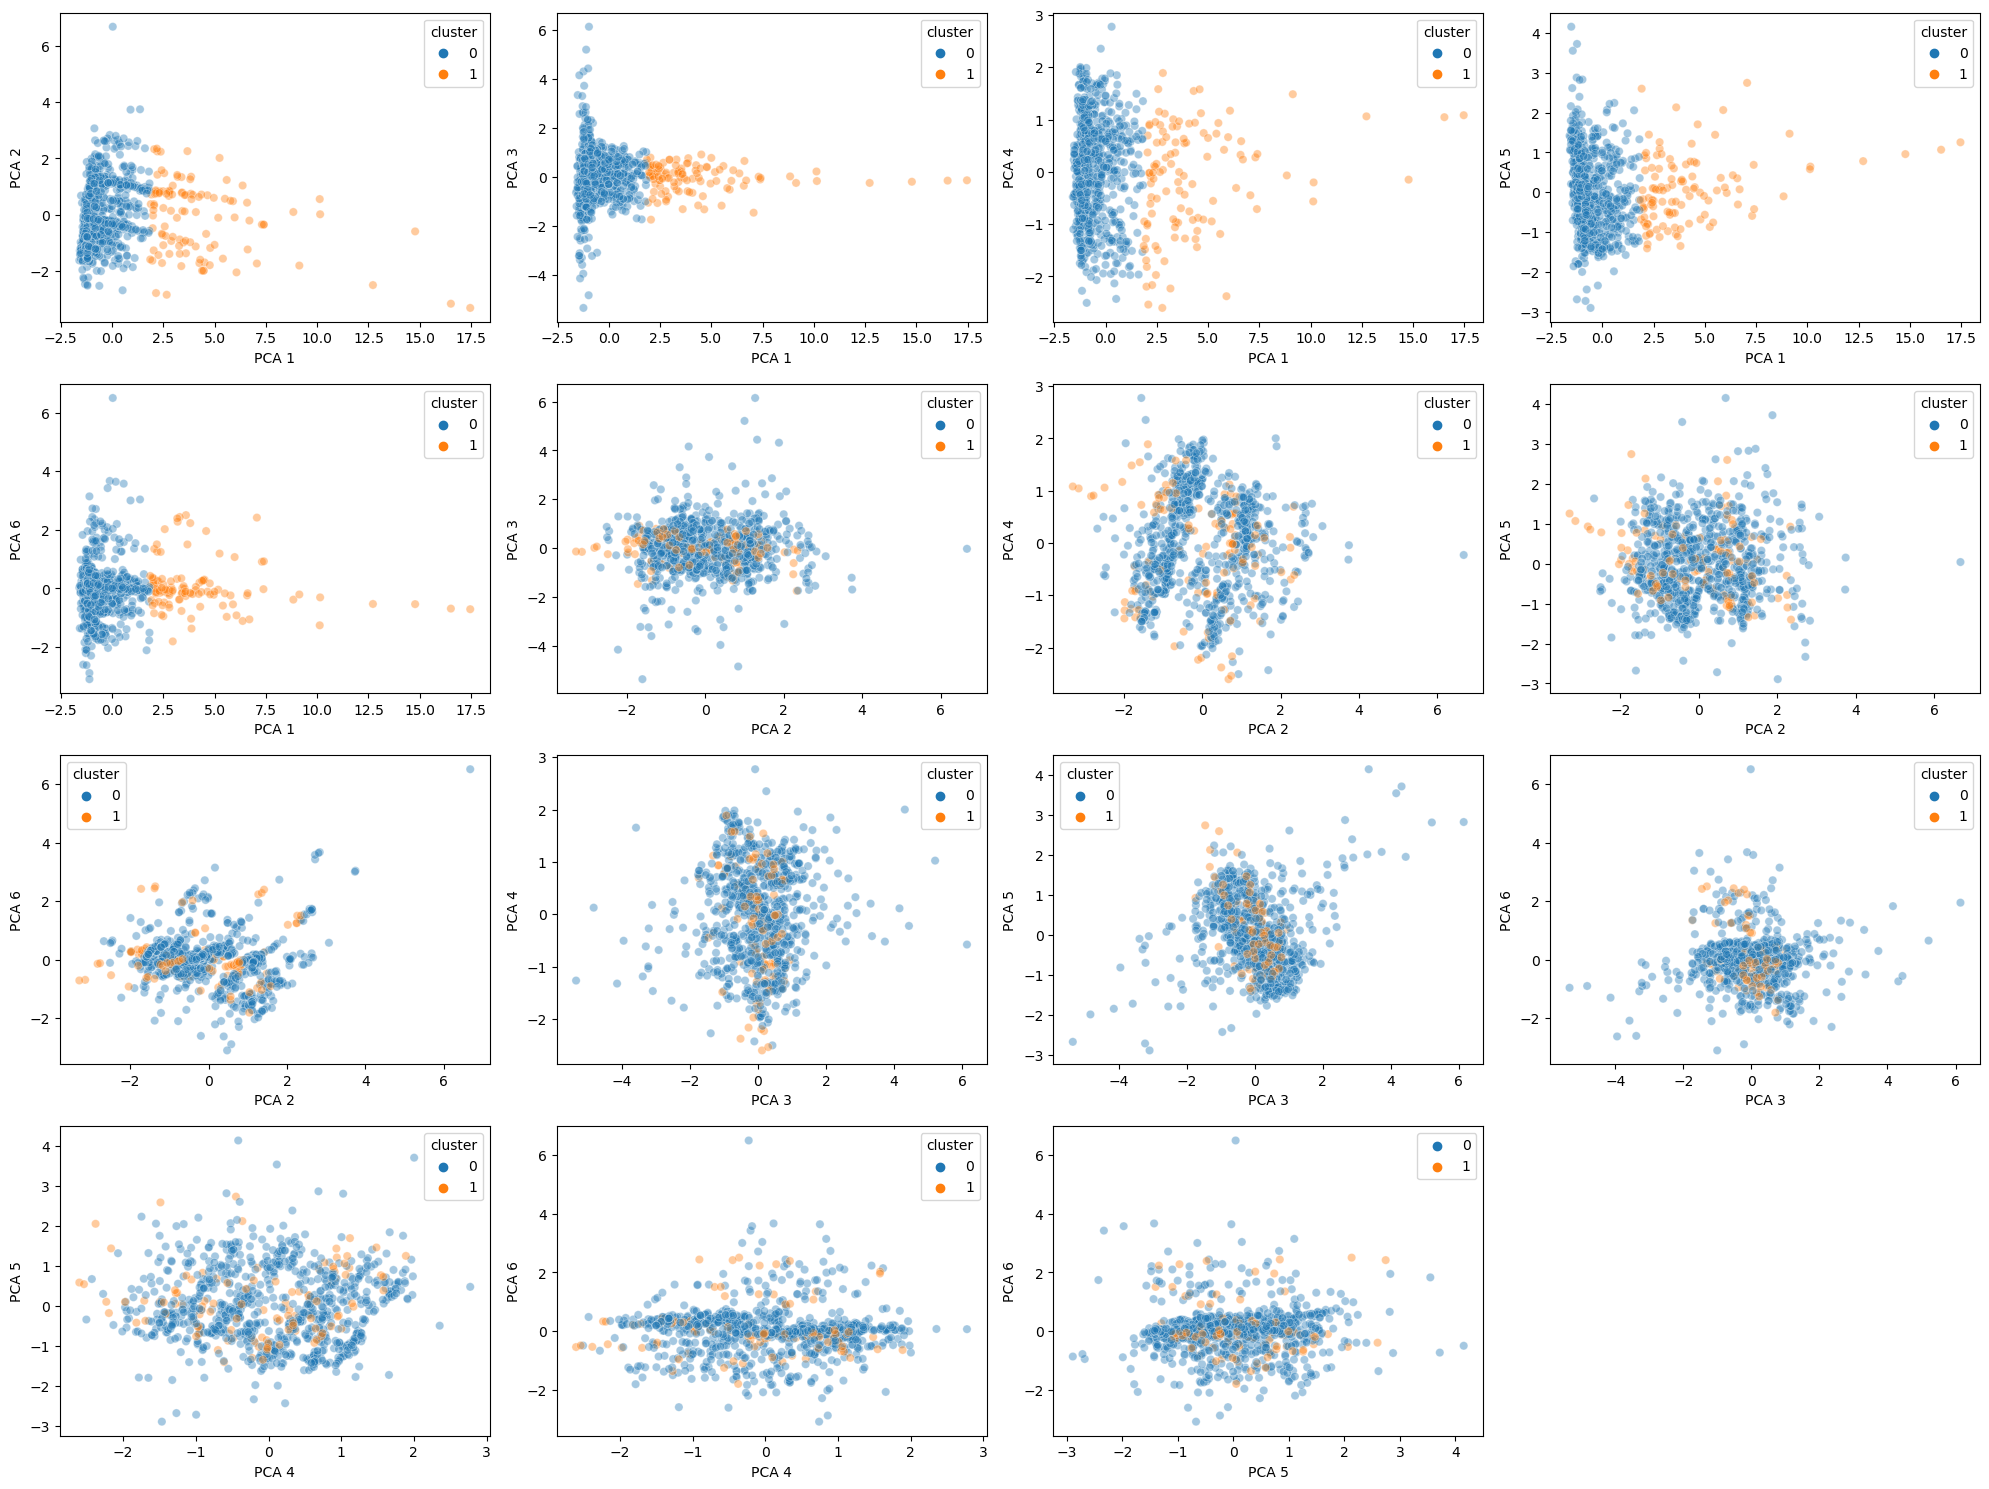

In [46]:
pca_list = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']
#pca_list = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
#pca_list = ['PCA1', 'PCA2', 'PCA3']
#pca_list = ['PCA1', 'PCA2']

fig = plt.figure(figsize = (20,15))
plt.title('PCA plot with cluster')

count = 0
for i in range(len(pca_list)):
    for j in range(i+1, len(pca_list)):    
        count += 1
        plt.subplot(4,4, count)
        sb.scatterplot(x=pca_list[i],y=pca_list[j],hue="cluster",data=pca_df_kmeans,alpha=0.4)
        plt.xlabel('PCA {}'.format(i+1))
        plt.ylabel('PCA {}'.format(j+1))
        
plt.legend()
plt.tight_layout()

<Axes: xlabel='PCA1', ylabel='PCA2'>

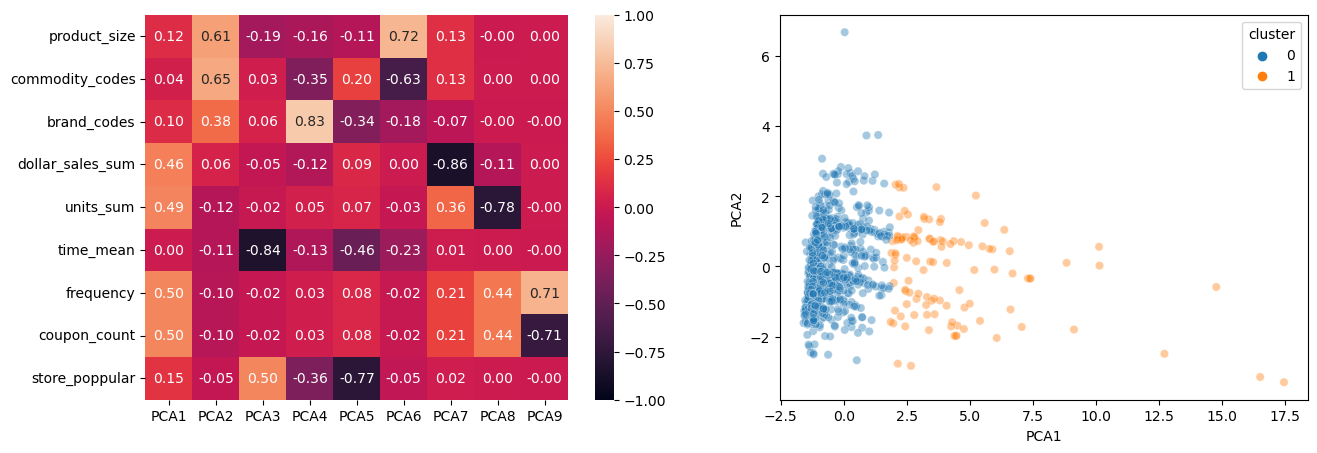

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.heatmap(loading, annot=True, fmt='.2f',vmin=-1,vmax=1)
plt.subplot(1,2,2)
sb.scatterplot(x='PCA1',y='PCA2',hue="cluster",data=pca_df_kmeans,alpha=0.4)

In [31]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[prod_seg.columns])
# inverse transform the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[prod_seg.columns])
cluster_centers

,product_size,commodity_codes,brand_codes,dollar_sales_sum,units_sum,time_mean,frequency,coupon_count,store_poppular
0,18.274847,1.557055,68.813497,5086.737006,3034.312883,1541.429371,2589.461350,2589.461350,205.995092
1,23.487946,1.642857,79.401786,44503.475268,33452.339286,1544.923224,27564.910714,27564.910714,283.491071


In [54]:
prod_seg['Cluster'] = kmeans_model.labels_
prod_seg

,product_size,commodity_codes,brand_codes,dollar_sales_sum,units_sum,time_mean,frequency,coupon_count,store_poppular,Cluster
upc,,,,,,,,,,
111112360,25.0,2,126,184.68,32,1604.964286,28,28,139,0
566300023,40.0,3,100,231.93,67,1452.639344,61,61,46,0
566300028,19.0,3,81,3446.55,1185,1500.142857,1078,1078,67,0
566300029,12.0,3,81,2.98,2,1128.500000,2,2,59,0
566300035,19.0,3,100,33.25,15,1570.533333,15,15,152,0
...,...,...,...,...,...,...,...,...,...,...
9999985217,16.0,1,104,2236.47,2644,1536.109746,2360,2360,5,0
9999985260,32.0,0,104,28654.73,22903,1517.783703,20310,20310,109,1
9999985261,32.0,0,104,44962.09,35493,1514.743590,31785,31785,109,1


In [53]:
prod_seg['dollar_sales_sum'].sum()

9130079.89

In [33]:
c_0 = prod_seg[prod_seg['Cluster'] == 0]
c_1 = prod_seg[prod_seg['Cluster'] == 1]
c_0.shape,c_1.shape

((815, 10), (112, 10))

Text(0.5, 1.0, 'Product Cluster size')

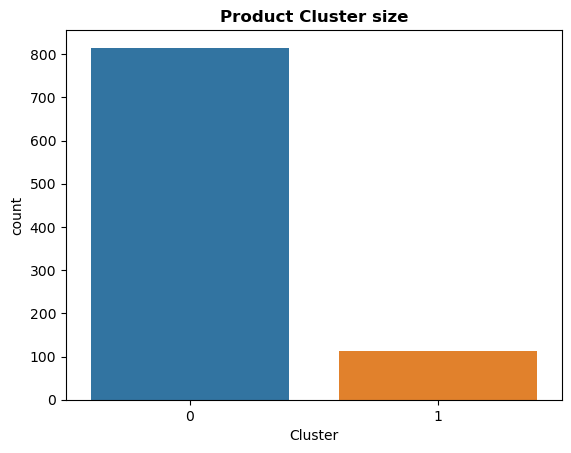

In [34]:
sb.countplot(data=prod_seg, x='Cluster')
plt.title('Product Cluster size', fontweight='bold')

In [63]:
prod_seg[prod_seg['Cluster'] == 0]['dollar_sales_sum'].sum(), prod_seg[prod_seg['Cluster'] == 1]['dollar_sales_sum'].sum()

(4145690.66, 4984389.2299999995)

In [65]:
prod_seg[prod_seg['Cluster'] == 0]['units_sum'].sum(), prod_seg[prod_seg['Cluster'] == 1]['units_sum'].sum()

(2472965, 3746662)

In [35]:
prod_seg.to_csv("cluster label.csv")

In [36]:
prod_seg.columns

Index(['product_size', 'commodity_codes', 'brand_codes', 'dollar_sales_sum',
       'units_sum', 'time_mean', 'frequency', 'coupon_count', 'store_poppular',
       'Cluster'],
      dtype='object')

Text(0.5, 0, 'Frequency')

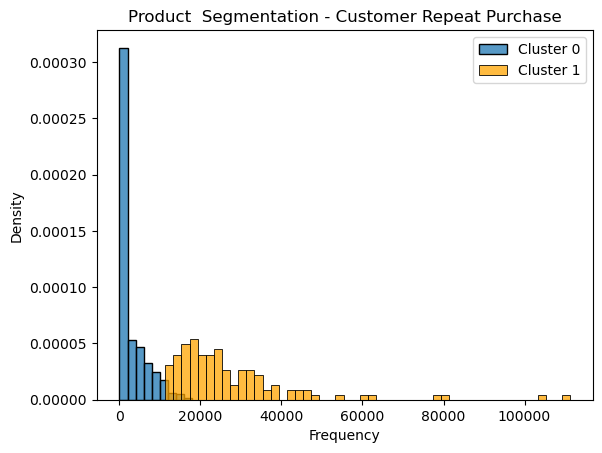

In [37]:
c0_sales = c_0.groupby('upc')['frequency'].sum().to_frame()
c1_sales = c_1.groupby('upc')['frequency'].sum().to_frame()
sb.histplot(c0_sales,x='frequency',label='Cluster 0',stat='density',binwidth=2000)
sb.histplot(c1_sales, x='frequency',label='Cluster 1', stat='density',color='orange',binwidth=2000)
plt.legend()
plt.title('Product  Segmentation - Customer Repeat Purchase')
plt.xlabel('Frequency')

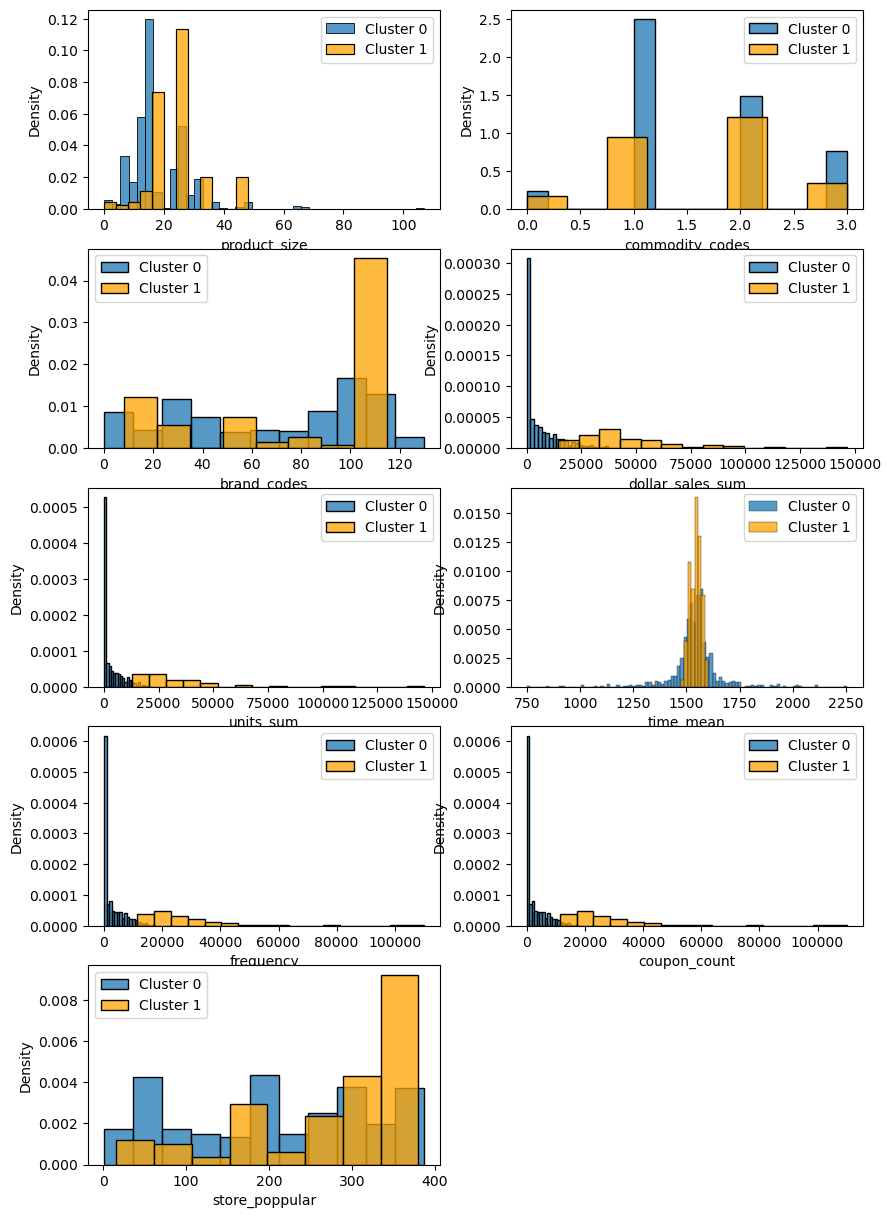

In [38]:
feature_list = ['product_size', 'commodity_codes', 'brand_codes', 'dollar_sales_sum',
       'units_sum', 'time_mean', 'frequency', 'coupon_count', 'store_poppular']

plt.figure(figsize=(10,15))
for i, feat in enumerate(feature_list):
    plt.subplot(5,2, i+1)
    c0_data = c_0.groupby('upc')[feat].sum().to_frame()
    sb.histplot(c0_data,x=feat,label='Cluster 0',stat='density')
    c1_data = c_1.groupby('upc')[feat].sum().to_frame()
    sb.histplot(c1_data, x=feat,label='Cluster 1', stat='density',color='orange')
    plt.legend()
    plt.xlabel(feat)

In [39]:
c_1.groupby('upc')['brand_codes'].sum().to_frame()

,brand_codes
upc,
601011296,10
601011588,10
1510000007,33
1510000031,33
1510000043,33
...,...
9999985127,104
9999985128,104
9999985133,104


In [40]:
c_1.groupby('store_poppular')['store_poppular'].count()

store_poppular
16      1
17      4
32      1
71      4
92      1
109     2
154     3
179     2
190     1
196     9
207     1
234     1
235     1
259     2
264     3
270     5
271     1
277     1
307     5
308     1
316     7
319     1
322     3
326     5
353     1
359    12
368     2
371     3
373     2
375    17
378     9
380     1
Name: store_poppular, dtype: int64

# Train & Test

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [42]:
x = prod_seg.drop(['Cluster'],axis=1)
y= prod_seg[['Cluster']]
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3)

In [43]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [44]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[250   1]
 [  2  26]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       251
           1       0.96      0.93      0.95        28

    accuracy                           0.99       279
   macro avg       0.98      0.96      0.97       279
weighted avg       0.99      0.99      0.99       279

